In [ ]:
import requests
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from selenium import webdriver

%matplotlib inline

# CFB

In [ ]:
driver = webdriver.Chrome()
driver.get('https://google.com')
time.sleep(3)
driver.close()
driver.quit()

### Data collection functions

In [ ]:
def get_data(url: str) -> pd.DataFrame:
    """ 
    Function takes a url string, makes a request to the website, gets a list of the data table,
    and then concatenates all tables if necessary.
    url: string of the website
    returns: dataframe of the data
    """
    html = requests.get(url).content
    df_list = pd.read_html(html)

    # concatenating all dataframes from the list together
    started = False
    for datafame in df_list:
        if not started: 
            df = datafame
            started = True
        else:
            df = pd.concat([df, datafame], axis=1)

    df.columns = [col.lower() for col in df.columns]
    return df

In [ ]:
def get_ncaa_cfb_data(url: str) -> pd.DataFrame:
    """ 
    Function to get the data from the specified websites. The function 
    takes a url string, makes requests getting the tables from the website,
    and then concatinating the dataframes together.
    :param url: string of the beginning url
    """
    started = False
    collecting_data = True 
    i = 1
    while collecting_data:
        try:
            if not started:
                df = get_data(url)
                started = True
            else:
                df = pd.concat([df, get_data(url+'/p{}'.format(i))], axis=0)
            print('Collecting data ...')
        except Exception:
            print('Finished!')
            collecting_data = False 
        i += 1
    return df

### Getting the college football quarterback data

In [ ]:
# collecting the data
df = get_ncaa_cfb_data('https://www.ncaa.com/stats/football/fbs/current/individual/453')

Finished!


In [ ]:
df.describe()

,g,pass att,pass com,int,pass td,pass yds
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,3.389313,75.511450,46.519084,1.969466,4.320611,572.343511
std,1.199824,54.998093,35.286596,1.999765,3.987031,452.282107
min,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000
25%,3.000000,22.000000,12.500000,1.000000,1.000000,148.500000
50%,3.000000,66.000000,40.000000,2.000000,3.000000,483.000000
75%,4.000000,119.000000,74.500000,3.000000,6.000000,906.000000
max,6.000000,233.000000,130.000000,11.000000,16.000000,1756.000000


In [ ]:
# add in a few columns such as cmp% and qb rating
# completion percentage
df['cmp_percent'] = df['pass com'] / df['pass att']

# yards per attempt
df['yards_per_attempt'] = df['pass yds'] / df['pass att']

# tds per attempt
df['touchdowns_per_attempt'] = df['pass td'] / df['pass att']

# interceptions per attempt
df['interceptions_per_attempt'] = df['int'] / df['pass att']

In [ ]:
# qb rating which is a combination of 4 sub calculations
a = (df.cmp_percent - 0.3) * 5
b = (df.yards_per_attempt - 3) * 0.25
c = df.touchdowns_per_attempt * 20
d = 2.375 - df.interceptions_per_attempt * 25
df['qbr'] = ((a+b+c+d) / 6) * 100

In [ ]:
df.sort_values('pass yds', ascending=False)

,rank,name,team,cl,position,g,pass att,pass com,int,pass td,pass yds,cmp_percent,yards_per_attempt,touchdowns_per_attempt,interceptions_per_attempt,qbr
0,1,Dillon Gabriel,UCF,So.,QB,4,188,122,2,14,1756,0.648936,9.340426,0.074468,0.010638,115.469858
0,1,Dillon Gabriel,UCF,So.,QB,4,188,122,2,14,1756,0.648936,9.340426,0.074468,0.010638,115.469858
1,2,Shane Buechele,SMU,Sr.,QB,5,177,119,2,12,1710,0.672316,9.661017,0.067797,0.011299,116.254708
1,2,Shane Buechele,SMU,Sr.,QB,5,177,119,2,12,1710,0.672316,9.661017,0.067797,0.011299,116.254708
2,3,Zach Wilson,BYU,Jr.,QB,5,136,107,1,12,1641,0.786765,12.066176,0.088235,0.007353,144.270833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,126,Austin Kendall,West Virginia,Sr.,QB,1,6,3,0,0,43,0.500000,7.166667,0.000000,0.000000,73.611111
26,127,Kaylan Wiggins,FIU,Jr.,QB,2,19,6,1,0,42,0.315789,2.210526,0.000000,0.052632,15.679825
27,128,Haaziq Daniels,Air Force,So.,QB,1,9,4,0,0,41,0.444444,4.555556,0.000000,0.000000,58.101852
28,NaN,Mike Fallon,Massachusetts,Sr.,QB,1,12,7,1,0,41,0.583333,3.416667,0.000000,0.083333,30.208333


In [ ]:
df.columns[-5:-1]

Index(['cmp_percent', 'yards_per_attempt', 'touchdowns_per_attempt',
       'interceptions_per_attempt'],
      dtype='object')

In [ ]:
df.head()

,rank,name,team,cl,position,g,pass att,pass com,int,pass td,pass yds,cmp_percent,yards_per_attempt,touchdowns_per_attempt,interceptions_per_attempt,qbr
0,1,Kenny Pickett,Pittsburgh,Sr.,QB,5,180,108,3,8,1389,0.600000,7.716667,0.044444,0.016667,92.106481
1,2,Shane Buechele,SMU,Sr.,QB,4,140,96,2,10,1326,0.685714,9.471429,0.071429,0.014286,116.547619
2,3,Chase Brice,Duke,Jr.,QB,5,193,104,8,5,1271,0.538860,6.585492,0.025907,0.041451,65.792314
3,4,Zach Wilson,BYU,Jr.,QB,4,101,82,1,8,1241,0.811881,12.287129,0.079208,0.009901,143.213696
4,5,Sam Ehlinger,Texas,Sr.,QB,4,162,99,4,16,1211,0.611111,7.475309,0.098765,0.024691,106.790123


In [ ]:
df.describe()

,g,pass att,pass com,int,pass td,pass yds,cmp_percent,yards_per_attempt,touchdowns_per_attempt,interceptions_per_attempt,qbr
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,2.916031,62.977099,38.877863,1.603053,3.511450,477.832061,0.622702,8.436512,0.067187,0.026870,100.327170
std,1.060030,47.458721,30.162132,1.730626,3.349779,382.091253,0.123946,5.987053,0.105188,0.031738,63.385515
min,1.000000,1.000000,1.000000,0.000000,0.000000,33.000000,0.315789,2.210526,0.000000,0.000000,-8.035714
25%,2.000000,19.000000,10.000000,0.000000,1.000000,124.500000,0.556701,6.151835,0.026847,0.000000,76.191223
50%,3.000000,57.000000,36.000000,1.000000,3.000000,411.000000,0.614035,7.540816,0.051724,0.019231,92.144809
75%,4.000000,96.000000,59.500000,2.000000,6.000000,727.000000,0.670940,8.942857,0.075696,0.038611,108.445670
max,5.000000,193.000000,115.000000,9.000000,16.000000,1389.000000,1.000000,48.000000,1.000000,0.200000,618.750000


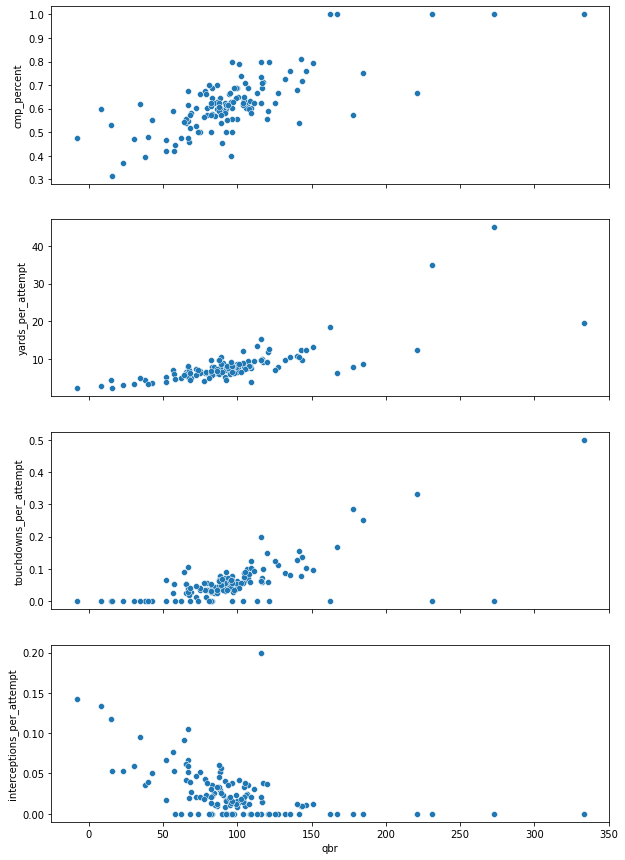

In [ ]:
f, axes = plt.subplots(4, 1, figsize=(10, 15), sharex='col')
y_values = df.columns[-5:-1]
df = df[df.qbr < 400]

for i, col in enumerate(y_values):
    sns.scatterplot(x='qbr', y=col, data=df, ax=axes[i])

In [ ]:
# creating a min amount of passes needed to qualify
df_min_passes = df[df['pass att'] > 30]

In [ ]:
df_min_passes.describe()

,g,pass att,pass com,int,pass td,pass yds,cmp_percent,yards_per_attempt,touchdowns_per_attempt,interceptions_per_attempt,qbr
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,3.265060,90.939759,56.518072,2.240964,5.084337,696.662651,0.617639,7.660448,0.054835,0.025465,93.139806
std,0.797624,36.996819,23.823723,1.818538,3.235492,311.072742,0.070818,1.788685,0.026802,0.017618,20.973974
min,1.000000,32.000000,16.000000,0.000000,0.000000,171.000000,0.421053,3.420000,0.000000,0.000000,39.666667
25%,3.000000,64.000000,40.000000,1.000000,3.000000,471.000000,0.579950,6.384249,0.035099,0.012829,80.988152
50%,3.000000,86.000000,55.000000,2.000000,5.000000,632.000000,0.614286,7.653846,0.052632,0.020833,91.726190
75%,4.000000,115.000000,71.500000,3.000000,7.000000,921.000000,0.656118,8.564788,0.070802,0.037060,104.585087
max,5.000000,193.000000,115.000000,9.000000,16.000000,1389.000000,0.811881,13.265060,0.135922,0.076923,150.727912


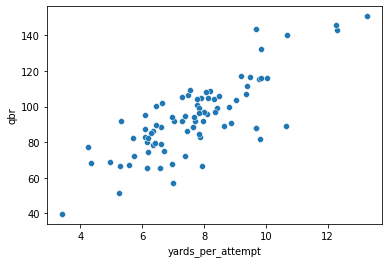

In [ ]:
sns.scatterplot(x='yards_per_attempt', y='qbr', data=df_min_passes)

In [ ]:
pd.pivot_table(
    data=df_min_passes, index='pass td', 
    values=['qbr', 'yards_per_attempt']).sort_values(
        'yards_per_attempt', 
        ascending=False)

,qbr,yards_per_attempt
pass td,,
14,143.507282,9.669903
8,115.184396,9.662517
11,123.323938,9.589102
9,114.046944,9.511231
13,117.264212,9.193798
10,119.281120,8.946610
2,83.471718,7.830922
7,101.775210,7.676903
4,94.457034,7.631954


In [ ]:
pd.pivot_table(data=df_min_passes, index='pass td', values=['qbr', 'touchdowns_per_attempt']).sort_values('touchdowns_per_attempt', ascending=False)

,qbr,touchdowns_per_attempt
pass td,,
14,143.507282,0.135922
11,123.323938,0.105203
13,117.264212,0.100775
16,106.790123,0.098765
10,119.281120,0.086559
9,114.046944,0.079867
8,115.184396,0.070679
7,101.775210,0.069419
6,91.922778,0.061768


In [ ]:
df_min_passes[
    ['touchdowns_per_attempt', 
     'yards_per_attempt', 
     'cmp_percent', 
     'interceptions_per_attempt',
     'qbr']].corr()

,touchdowns_per_attempt,yards_per_attempt,cmp_percent,interceptions_per_attempt,qbr
touchdowns_per_attempt,1.000000,0.584850,0.480135,-0.092319,0.801180
yards_per_attempt,0.584850,1.000000,0.512145,-0.134863,0.795763
cmp_percent,0.480135,0.512145,1.000000,-0.177745,0.730084
interceptions_per_attempt,-0.092319,-0.134863,-0.177745,1.000000,-0.487263
qbr,0.801180,0.795763,0.730084,-0.487263,1.000000


The highest correlation is the touchdowns per attempt by the quarterback. This makes sense as the calculation for the qbr relies on this variable and it is a higher factor than the other variables in the calculation. The next highest is the yards per attempt, meaning that the more touchdowns a qb has with less attempts will raise the qbr and having more yards with fewer attempts. 

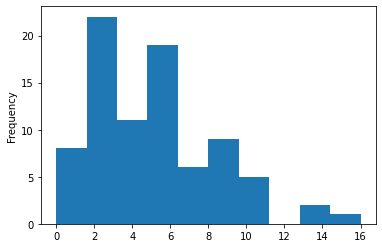

In [ ]:
df_min_passes['pass td'].plot.hist()

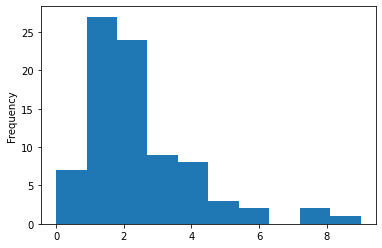

In [ ]:
df_min_passes['int'].plot.hist()

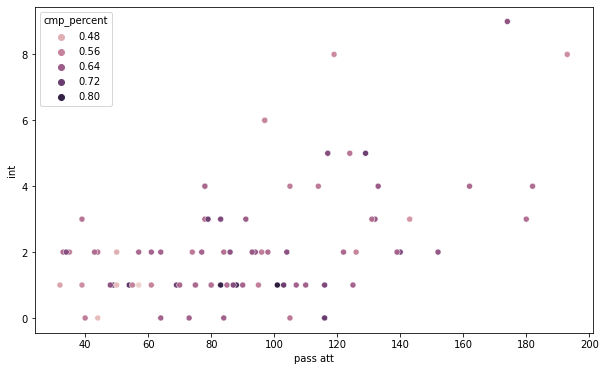

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pass att', y='int', hue='cmp_percent', data=df_min_passes)

In [ ]:
# getting the dividing point to look at completion percentage as pass attempts increase
avg_number_attempts = int(df_min_passes['pass att'].mean())

# lower half completion percentages
lower_comp_percent = df_min_passes[
    df_min_passes['pass att'] <= avg_number_attempts]['cmp_percent'].mean()

# upper half completion percentages
upper_comp_percent = df_min_passes[
    df_min_passes['pass att'] > avg_number_attempts]['cmp_percent'].mean()

In [ ]:
print('mean number of attempts: {}'.format(avg_number_attempts))
print('lower: {}'.format(lower_comp_percent))
print('upper: {}'.format(upper_comp_percent))

mean number of attempts: 90
lower: 0.614878722597918
upper: 0.6209084946907978


Above we see that generally as the number of passes attempted increases the number of interceptions increases as well. This comes as no surprise because as you increase the number of times you are throwing the ball, the more likely you are to make a mistake leading to an interception. 

What is interesting is that the completion percentage doesn't necessarily fall dramatically when increasing the number of attempts. 

In [ ]:
lower_comp_percent_df = df_min_passes[
    df_min_passes['pass att'] <= avg_number_attempts]
lower_comp_percent_df.sort_values('cmp_percent', ascending=False)

,rank,name,team,cl,position,g,pass att,pass com,int,pass td,pass yds,cmp_percent,yards_per_attempt,touchdowns_per_attempt,interceptions_per_attempt,qbr
14,15,Mac Jones,Alabama,Jr.,QB,3,83,66,1,8,1101,0.795181,13.265060,0.096386,0.012048,150.727912
15,16,Matt Corral,Ole Miss,So.,QB,3,88,67,1,9,1080,0.761364,12.272727,0.102273,0.011364,146.022727
19,70,Henry Colombi,Texas Tech,Jr.,QB,2,54,40,1,3,359,0.740741,6.648148,0.055556,0.018519,102.314815
10,61,Shane Illingworth,Oklahoma St.,Fr.,QB,3,49,36,1,3,483,0.734694,9.857143,0.061224,0.020408,116.284014
35,36,Connor Bazelak,Missouri,Fr.,QB,3,69,49,1,4,692,0.710145,10.028986,0.057971,0.014493,116.334541
5,56,Brady White,Memphis,Sr.,QB,2,79,56,3,7,576,0.708861,7.291139,0.088608,0.037975,105.247890
42,43,Max Duggan,TCU,So.,QB,3,80,55,1,3,626,0.687500,7.825000,0.037500,0.012500,99.270833
26,27,Sam Howell,North Carolina,So.,QB,3,83,57,3,6,777,0.686747,9.361446,0.072289,0.036145,107.354418
20,21,Grayson McCall,Coastal Carolina,Fr.,QB,4,87,59,1,11,930,0.678161,10.689655,0.126437,0.011494,140.493295
37,88,Aaron Allen,Louisiana Tech,So.,QB,4,34,23,2,1,190,0.676471,5.588235,0.029412,0.058824,67.034314


In [ ]:
df_min_passes.shape

(83, 16)

In [ ]:
upper_comp_percent_df = df_min_passes[
    df_min_passes['pass att'] > avg_number_attempts]
upper_comp_percent_df.sort_values('cmp_percent', ascending=False)

,rank,name,team,cl,position,g,pass att,pass com,int,pass td,pass yds,cmp_percent,yards_per_attempt,touchdowns_per_attempt,interceptions_per_attempt,qbr
3,4,Zach Wilson,BYU,Jr.,QB,4,101,82,1,8,1241,0.811881,12.287129,0.079208,0.009901,143.213696
9,10,Trevor Lawrence,Clemson,Jr.,QB,4,116,84,0,10,1140,0.724138,9.827586,0.086207,0.000000,132.112069
17,18,Kyle Trask,Florida,Sr.,QB,3,103,74,1,14,996,0.718447,9.669903,0.135922,0.009709,143.507282
5,6,Spencer Rattler,Oklahoma,Fr.,QB,4,129,92,5,13,1186,0.713178,9.193798,0.100775,0.038760,117.264212
27,28,Gunnar Watson,Troy,So.,QB,3,116,80,1,6,748,0.689655,6.448276,0.051724,0.008621,100.071839
1,2,Shane Buechele,SMU,Sr.,QB,4,140,96,2,10,1326,0.685714,9.471429,0.071429,0.014286,116.547619
28,29,Asher O'Hara,Middle Tenn.,Jr.,QB,4,117,79,5,4,744,0.675214,6.358974,0.034188,0.042735,78.436610
33,34,Jarret Doege,West Virginia,Jr.,QB,3,104,69,2,5,724,0.663462,6.961538,0.048077,0.019231,94.391026
7,8,K.J. Costello,Mississippi St.,Sr.,QB,3,174,115,9,6,1168,0.660920,6.712644,0.034483,0.051724,75.071839
6,7,Phil Jurkovec,Boston College,Jr.,QB,4,152,99,2,8,1181,0.651316,7.769737,0.052632,0.013158,100.794956


In [ ]:
print(upper_comp_percent_df.shape)
print(lower_comp_percent_df.shape)

(38, 16)
(45, 16)


In [ ]:
# getting the lower completion percentage max yard attempt
max_lower = lower_comp_percent_df['yards_per_attempt'].max()
max_lower_cmp_percent = lower_comp_percent_df['cmp_percent'].max()

# getting upper completion percentage max yard attempt
max_higher = upper_comp_percent_df['yards_per_attempt'].max()
max_higher_cmp_percent = upper_comp_percent_df['cmp_percent'].max()

print('max of lower: {}, max of cmp lower: {}'.format(max_lower, max_lower_cmp_percent))
print('max of upper: {}, max of cmp upper: {}'.format(max_higher, max_higher_cmp_percent))

max of lower: 13.265060240963855, max of cmp lower: 0.7951807228915663
max of upper: 12.287128712871286, max of cmp upper: 0.8118811881188119


In [ ]:
max_lower_pos = lower_comp_percent_df.index[
    lower_comp_percent_df['yards_per_attempt'] == max_lower
]
max_lower_pos

Int64Index([14], dtype='int64')

In [ ]:
max_upper_pos = upper_comp_percent_df.index[
    upper_comp_percent_df['yards_per_attempt'] == max_higher
]
max_upper_pos

Int64Index([3], dtype='int64')

* Get team data
* Get game qb and defense data
* Make a randomness/upset factor (look at past upsets and analyze/calculate)

### Team data extraction

In [ ]:
team_data_url = 'https://www.ncaa.com/stats/football/fbs/current/team/28'
team_df = get_ncaa_cfb_data(url=team_data_url)

Finished!


In [ ]:
team_df.describe()

,g,tds,opp xp,2pt,opp dxp,opp fgm,opp saf,pts,avg
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,4.404651,18.502326,17.176744,0.325581,0.023256,5.079070,0.130233,144.386047,31.766047
std,3.225045,15.912986,14.998642,0.608389,0.151067,4.324272,0.363996,121.695939,7.477312
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000
25%,3.000000,11.000000,9.000000,0.000000,0.000000,2.000000,0.000000,84.000000,28.100000
50%,3.000000,13.000000,12.000000,0.000000,0.000000,4.000000,0.000000,100.000000,32.300000
75%,4.000000,17.000000,16.000000,1.000000,0.000000,6.000000,0.000000,130.000000,36.000000
max,13.000000,86.000000,84.000000,3.000000,1.000000,25.000000,2.000000,632.000000,52.700000


So far in 2020 there haven't been more than 6 games by a CFB team. This means that we need to remove rows that have greater than 6 games.

In [ ]:
team_df = team_df[team_df['g'] < 7]

In [ ]:
team_df.describe()

,g,tds,opp xp,2pt,opp dxp,opp fgm,opp saf,pts,avg
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,3.140541,12.389189,11.481081,0.227027,0.016216,3.627027,0.102703,97.389189,31.137838
std,0.745807,4.133623,4.206739,0.468954,0.126649,1.898605,0.304394,31.020503,7.721228
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000
25%,3.000000,10.000000,9.000000,0.000000,0.000000,2.000000,0.000000,81.000000,27.500000
50%,3.000000,12.000000,11.000000,0.000000,0.000000,3.000000,0.000000,95.000000,30.700000
75%,3.000000,14.000000,14.000000,0.000000,0.000000,5.000000,0.000000,111.000000,35.300000
max,5.000000,26.000000,25.000000,2.000000,1.000000,8.000000,1.000000,199.000000,51.700000


In [ ]:
team_df.sort_values('avg', ascending=True).head(30)

,rank,team,g,tds,opp xp,2pt,opp dxp,opp fgm,opp saf,pts,avg
0,1,Air Force,1,1,1,0,0,0,0,7.0,7.0
1,NaN,Marshall,3,3,3,0,0,0,0,21.0,7.0
2,3,Oklahoma St.,3,3,3,0,0,2,0,27.0,9.0
3,4,Cincinnati,3,4,4,0,0,3,0,37.0,12.3
4,NaN,Georgia,3,4,4,0,0,3,0,37.0,12.3
5,6,Army West Point,5,8,6,0,0,3,0,63.0,12.6
6,7,Notre Dame,3,4,3,0,0,4,0,39.0,13.0
7,8,Clemson,4,6,5,0,0,4,0,53.0,13.3
8,9,BYU,5,8,7,0,0,5,0,70.0,14.0
9,10,Fla. Atlantic,1,2,2,0,0,1,0,17.0,17.0
